In [1]:
import pandas as pd


In [2]:
traindata_all = pd.read_csv('./multimodal_train.tsv', sep='\t')
traindata_all.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2


In [3]:
traindata_all['Text label'] = traindata_all['6_way_label'].map({
                                            0:'True',
                                            1:'Satire/Parody',
                                            2:'Misleading Content',
                                            3:'Imposter Content',
                                            4:'False Connection',
                                            5:'Manipulated Content',
                                        })                                          

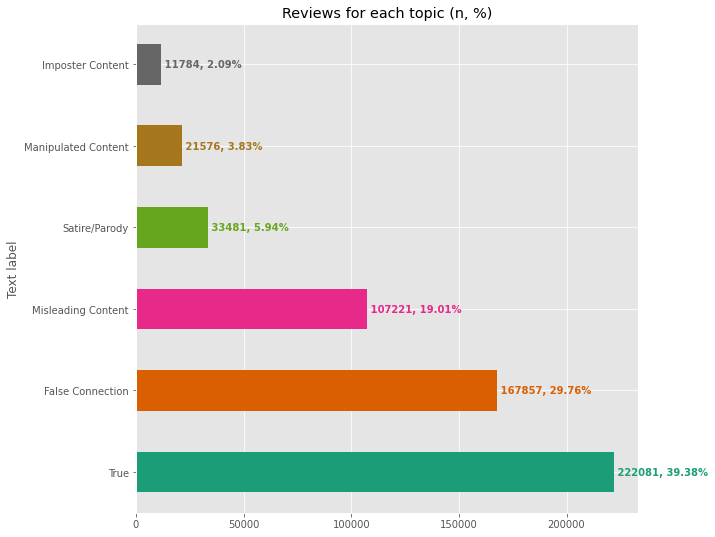

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(traindata_all["Text label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

traindata_all['Text label'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Text label",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(traindata_all['Text label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/traindata_all.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')


We need to balance the data undersampling to the size of 'Imposter Content'

In [5]:
df_0 = traindata_all[traindata_all['6_way_label']==0]
df_1 = traindata_all[traindata_all['6_way_label']==1]
df_2 = traindata_all[traindata_all['6_way_label']==2]
df_3 = traindata_all[traindata_all['6_way_label']==3]
df_4 = traindata_all[traindata_all['6_way_label']==4]
df_5 = traindata_all[traindata_all['6_way_label']==5]

In [6]:
df_0_under = df_0.sample(df_3.shape[0])
df_1_under = df_1.sample(df_3.shape[0])
df_2_under = df_2.sample(df_3.shape[0])
df_4_under = df_4.sample(df_3.shape[0])
df_5_under = df_5.sample(df_3.shape[0])

In [7]:
train_balanced = pd.concat([df_0_under, df_1_under, df_2_under, df_3, df_4_under, df_5_under])
train_balanced = train_balanced.sample(frac=1).reset_index(drop=True) # to shuffle after the concatenation

In [8]:
train_balanced

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,Text label
0,SupriseGodzilla,hes finally met his match,1.390953e+09,NaN,True,cf1ciej,http://i.imgur.com/hW4xJx2.jpg,1wefz9,NaN,3,psbattle_artwork,He's finally met his match.,NaN,0,2,4,False Connection
1,Topham_Kek,the domino of war in north korea s russian imp...,1.474782e+09,i.imgur.com,True,54dy1f,https://external-preview.redd.it/2PichLc1BWhM-...,NaN,1.0,69,propagandaposters,The Domino of War in North Korea (1950s): Russ...,0.98,0,1,5,Manipulated Content
2,jnoble50,here is my attempt i already started,1.471719e+09,NaN,True,d6po3fj,http://i.imgur.com/YBD5tnp.jpg,4ypdrg,NaN,37,psbattle_artwork,Here is my attempt I already started,NaN,0,2,4,False Connection
3,prematurealzheimers,roasted marshmallow,1.338239e+09,imgur.com,True,u98df,https://external-preview.redd.it/nD5MlgdB51PVe...,NaN,0.0,3,pareidolia,Roasted Marshmallow,1.00,0,2,2,Misleading Content
4,MerrickG22,woman with irritable bowel syndrome takes phar...,1.566532e+09,newsmutiny.com,True,cu8erb,https://external-preview.redd.it/PuCp6o3gx-FHF...,NaN,0.0,3,satire,Woman with Irritable Bowel Syndrome Takes Phar...,1.00,0,2,1,Satire/Parody
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70699,DoNotLickToaster,fda cautions against feeding your dog this foo...,1.569805e+09,archive.is,True,db447d,https://external-preview.redd.it/NmB9Ioif93TQP...,NaN,25.0,1231,savedyouaclick,FDA cautions against feeding your dog this foo...,0.97,0,2,5,Manipulated Content
70700,creepy-SS,this is horse at a park and i found at the cem...,1.520892e+09,i.redd.it,True,83yy0z,https://preview.redd.it/78zefedwvwxy.jpg?width...,NaN,40.0,29,subredditsimulator,This is horse at a park and I found at the Cem...,0.92,0,2,3,Imposter Content
70701,SaintRocket,eden dead malls of america,1.514992e+09,i.redd.it,True,7nv6cp,https://preview.redd.it/w519m6l3bv701.jpg?widt...,NaN,1.0,8,fakealbumcovers,Eden - Dead Malls of America,0.90,0,2,1,Satire/Parody
70702,AmazingAlo,i put omelettes onto my dog to see what would ...,1.470039e+09,i.redd.it,True,4vlgs7,https://preview.redd.it/zpqrclppwncx.jpg?width...,NaN,4.0,7,misleadingthumbnails,I put omelettes onto my dog to see what would ...,0.59,0,2,2,Misleading Content


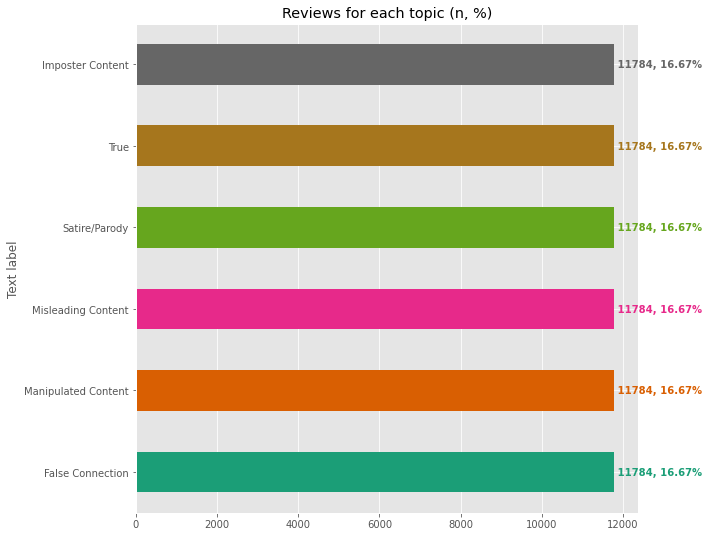

In [9]:
plt.style.use('ggplot')


num_classes = len(train_balanced["Text label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

train_balanced['Text label'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Text label",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(train_balanced['Text label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/train_balanced.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [10]:
test_all = pd.read_csv('./multimodal_test_public.tsv', sep='\t')
validate_all = pd.read_csv('./multimodal_validate.tsv', sep='\t')

test_all.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,trustbytrust,stargazer,1.425139e+09,NaN,True,cozywbv,http://i.imgur.com/BruWKDi.jpg,2xct9d,NaN,3,psbattle_artwork,stargazer,NaN,0,2,4
1,NaN,yeah,1.438173e+09,NaN,True,ctk61yw,http://i.imgur.com/JRZT727.jpg,3f0h7o,NaN,2,psbattle_artwork,yeah,NaN,0,2,4
2,chaseoes,pd phoenix car thief gets instructions from yo...,1.560492e+09,abc15.com,True,c0gl7r,https://external-preview.redd.it/1A2_4VwgS8Qd2...,NaN,2.0,16,nottheonion,PD: Phoenix car thief gets instructions from Y...,0.89,1,0,0
3,SFepicure,as trump accuses iran he has one problem his o...,1.560606e+09,nytimes.com,True,c0xdqy,https://external-preview.redd.it/9BKRcgvaobpTo...,NaN,4.0,45,neutralnews,"As Trump Accuses Iran, He Has One Problem: His...",0.78,1,0,0
4,fragments_from_Work,believers hezbollah,1.515139e+09,i.imgur.com,True,7o9rmx,https://external-preview.redd.it/rbwXHncnjVh51...,NaN,40.0,285,propagandaposters,"""Believers"" - Hezbollah 2011",0.95,0,1,5


In [11]:
test_all['Text label'] = test_all['6_way_label'].map({
                                            0:'True',
                                            1:'Satire/Parody',
                                            2:'Misleading Content',
                                            3:'Imposter Content',
                                            4:'False Connection',
                                            5:'Manipulated Content',
                                        })   

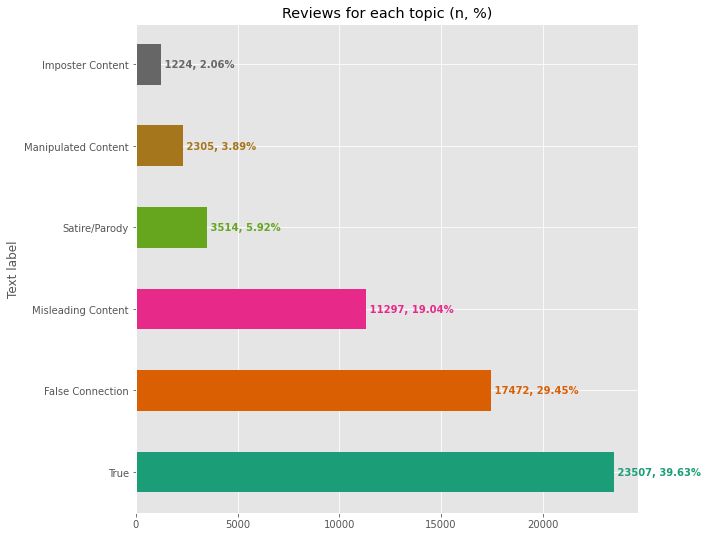

In [12]:
plt.style.use('ggplot')


num_classes = len(test_all["Text label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

test_all['Text label'].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Text label",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(test_all['Text label'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/test_all.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

There is no need to balance the test data.

In [13]:
!pip install transformers
from transformers import TrainingArguments

training_args = TrainingArguments("test_trainer", num_train_epochs=3)

Necesitamos convertirlos a datasets con los que puede trabajar el trainer ya que los dataframes de panda no funcionan

In [14]:
!pip install datasets
from datasets import Dataset

train = train_balanced[["clean_title","6_way_label"]]
eval = validate_all[["clean_title","6_way_label"]]

final_train = Dataset.from_pandas(train)
final_eval = Dataset.from_pandas(eval)

In [15]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [16]:
def tokenize_data(example):
    return tokenizer(example['clean_title'], padding='max_length')

In [17]:
final_train = final_train.map(tokenize_data, batched=True)
final_eval = final_eval.map(tokenize_data, batched=True)


  0%|          | 0/71 [00:00<?, ?ba/s]

  0%|          | 0/60 [00:00<?, ?ba/s]

In [ ]:
final_train = final_train.remove_columns(['clean_title', '6_way_label'])
final_eval = final_eval.remove_columns(['clean_title', '6_way_label'])

In [23]:
final_train

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 70704
})

In [19]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=6)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [20]:
from transformers import Trainer

trainer = Trainer(
    model=model, args=training_args, train_dataset=final_train, eval_dataset=final_eval
)

In [21]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 70704
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 26514


KeyError: ignored